In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import Master

In [3]:
Master.create_playlist_dataframe

<function Master.create_playlist_dataframe(playlist_id)>

In [4]:
!pip install spotipy

In [5]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials


sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id="8aaea3fe61404b23aa07c9f760df3985",
                                                           client_secret="e6670aad9bc94f1ba66f382abe39394c"))

In [6]:
df_1990=Master.create_playlist_dataframe('37i9dQZF1DXbTxeAdrVG2l')

In [7]:
pd.set_option('display.max_rows', None)

In [8]:
df_1990.head()

,cancion,cantante,año,duracion_minutos,album,explicito
0,All I Wanna Do,Sheryl Crow,1993,4.535100,Tuesday Night Music Club,False
1,Creep,Radiohead,1993,3.977333,Pablo Honey,True
2,Iris,The Goo Goo Dolls,1998,4.825550,Dizzy up the Girl,False
3,Barbie Girl,Aqua,1997,3.299333,Aquarium (Special Edition),False
4,Gangsta's Paradise,Coolio,1995,4.011550,Gangsta's Paradise,False


In [9]:
df_1990.explicito.value_counts() # encontramos los explicitos

explicito
False    90
True     10
Name: count, dtype: int64

In [10]:
df_1990_explicito=df_1990[df_1990['explicito']==True]
df_1990_explicito

,cancion,cantante,año,duracion_minutos,album,explicito
1,Creep,Radiohead,1993,3.977333,Pablo Honey,True
18,Still D.R.E.,Dr. Dre,1999,4.509767,2001,True
30,What's My Age Again?,blink-182,1999,2.472667,Enema Of The State,True
32,Good Riddance (Time of Your Life),Green Day,1997,2.557767,Nimrod,True
46,Killing Me Softly With His Song,Fugees,1996,4.979550,The Score (Expanded Edition),True
51,Even Flow,Pearl Jam,1991,4.876333,Ten,True
58,My Name Is,Eminem,1999,4.473333,The Slim Shady LP,True
61,"Nuthin' But A ""G"" Thang",Dr. Dre,1992,3.959550,The Chronic,True
93,Changes,2Pac,1998,4.480433,Greatest Hits,True
99,Regulate,Warren G,1994,4.147767,Regulate… G Funk Era,True


In [11]:
df_1990.sort_values(by= 'duracion_minutos',ascending=False,inplace=True)
df_1990.head

<bound method NDFrame.head of                                               cancion  \
29                                      November Rain   
22            Bitter Sweet Symphony - Remastered 2016   
77                                             Always   
82                                              Alive   
38                          Knockin' On Heaven's Door   
76                         Enter Sandman (Remastered)   
8                                     Californication   
9                               If It Makes You Happy   
83                                    Everybody Hurts   
68                               Doo Wop (That Thing)   
49                                     Black Hole Sun   
94                                              Crazy   
35                                     Wind Of Change   
10                                             Zombie   
44                                         No Diggity   
39                            Smells Like Teen Spirit   
6

In [12]:
df_1990.cantante.value_counts().sum() #Contamos las mujeres por los hombres

100

In [13]:
df_1990.cantante.value_counts()

cantante
Red Hot Chili Peppers       5
Nirvana                     4
Guns N' Roses               3
R.E.M.                      3
Radiohead                   3
Green Day                   3
The Offspring               3
Sheryl Crow                 2
Pearl Jam                   2
Foo Fighters                2
Lenny Kravitz               2
Dr. Dre                     2
TLC                         2
The Cranberries             2
blink-182                   2
Fools Garden                1
Warren G                    1
Natalie Imbruglia           1
Supergrass                  1
Mariah Carey                1
Ricky Martin                1
Weezer                      1
Coolio                      1
Cher                        1
Shaggy                      1
Lou Bega                    1
Dido                        1
Sublime                     1
Christina Aguilera          1
Blind Melon                 1
Alice Deejay                1
Spice Girls                 1
Gala                        1
B

In [14]:
(23/100)*100 #Calculamos el porcentaje de mujeres por el de los hombres e indagamos que de aqui el uno por ciento son mujeres

23.0

In [15]:
df_1990_Duration= df_1990.groupby(["cancion"]).agg({"duracion_minutos":'sum'})
df_1990_Duration.head()

,duracion_minutos
cancion,
...Baby One More Time,3.517767
1979 - Remastered 2012,4.436667
Alive,5.681783
All I Wanna Do,4.535100
All Star,3.339550


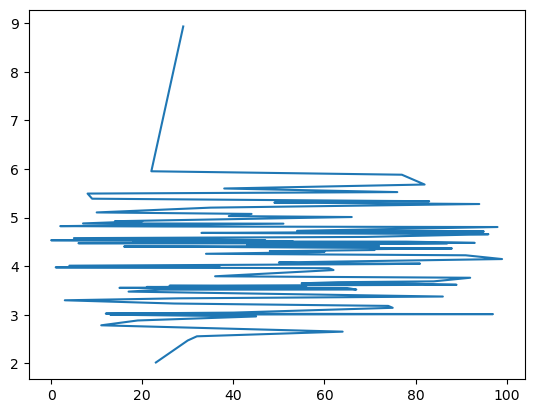

In [16]:
plt.plot(df_1990["duracion_minutos"]) 
plt.show()


In [17]:
df_1990.duracion_minutos.describe()

count    100.000000
mean       4.244371
std        0.942909
min        2.019333
25%        3.594171
50%        4.323433
75%        4.748437
max        8.934433
Name: duracion_minutos, dtype: float64

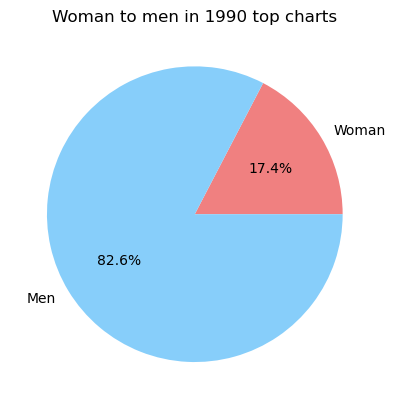

In [18]:
plt.title('Woman to men in 1990 top charts')
sizes = [21, 100]  # Porcentajes de cada categoría
labels = ['Woman', 'Men']
colors=['lightcoral','lightskyblue']

plt.pie(sizes,colors=colors, labels=labels, autopct='%1.1f%%')  # Crear el gráfico circular
plt.show()

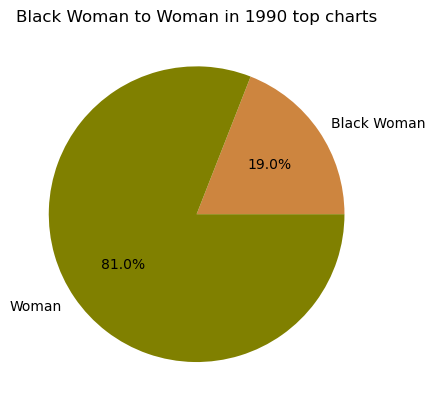

In [19]:
plt.title('Black Woman to Woman in 1990 top charts')
sizes = [4, 17]  # Porcentajes de cada categoría
labels = ['Black Woman', 'Woman']  # Etiquetas de las categorías
colors=['peru','olive']
plt.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%')  # Crear el gráfico circular
plt.show()

In [42]:
df_1990.to_csv('data_1990.csv', index=False)